In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

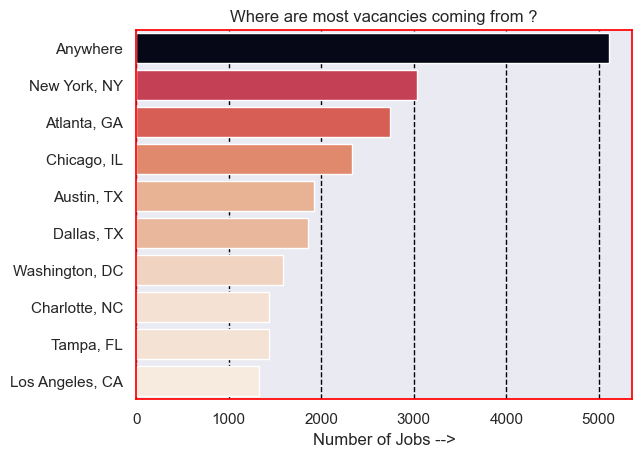

In [14]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

custom = {"axes.edgecolor": "red", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("darkgrid", rc = custom)
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='rocket_r')
plt.title('Where are most vacancies coming from ?')
plt.xlabel('Number of Jobs -->')
plt.ylabel('')
plt.legend().remove()
plt.show()

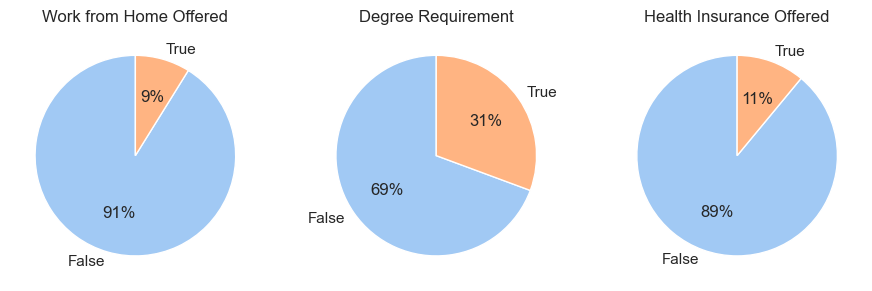

In [16]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

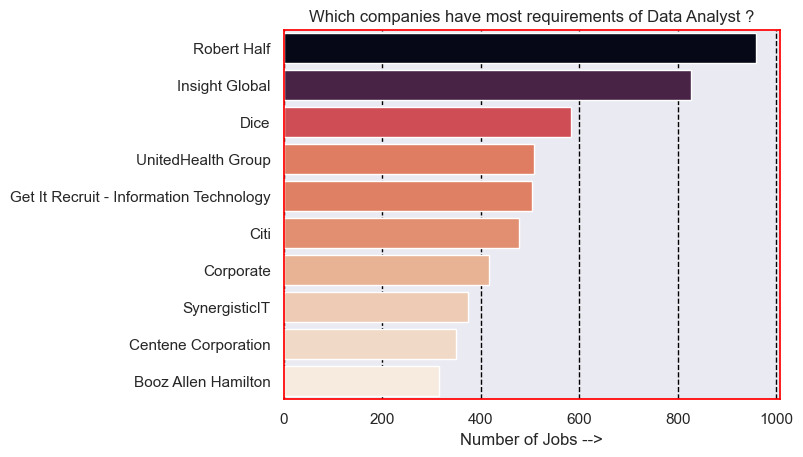

In [18]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

custom = {"axes.edgecolor": "red", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("darkgrid", rc = custom)
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='rocket_r')
plt.title('Which companies have most requirements of Data Analyst ?')
plt.xlabel('Number of Jobs -->')
plt.ylabel('')
plt.legend().remove()
plt.show()